In [ ]:
#1. 
#How do you handle duplicate values in a dataset in Python?
I will use DataFrame.drop_duplicates()
DataFrame['A'].unique()

In [ ]:
#2.
#You are given two tables - friend_request, request_accepted. 
#friend_request: 
requestor_id, time, sent_to_id 
#request_accepted: 
time, acceptor_id, requestor_id. 
#How will you determine the overall acceptance rate of requests? 

In [50]:
friend_request = pd.DataFrame(
    {"requestor_id":[1001,1002,1003],
     "time":["2017-07-01","2017-07-02","2017-07-03"],
     "receiver_id":[3001,3002,3003]}
)

request_accepted = pd.DataFrame(
    {"requestor_id":[1001,1003],
     "time":["2017-07-01","2017-07-04"],
     "acceptor_id":[3001,3003]}
)

print(friend_request)
print(request_accepted)

   receiver_id  requestor_id        time
0         3001          1001  2017-07-01
1         3002          1002  2017-07-02
2         3003          1003  2017-07-03
   acceptor_id  requestor_id        time
0         3001          1001  2017-07-01
1         3003          1003  2017-07-04


In [ ]:
# sql
'''
select
T1.date,
sum(if(t2.acceptor_id is null, 0, 1))/sum(1) as acceptance_rate
from friend_request t1
left join request_accepted t2
on t1.requester_id=t2.requeter_id
and T1.receiver_id=T2.acceptor_id
group by 1;
'''
#SQL
'''
SELECT
count(distinct B.acceptor_id,B.requestor_id)/
count(distinct A.requestor_id, A.sent_to_id) AS accept_rate
FROM freind_request AS A, request_accepted AS B
'''

In [56]:
#Python
len(request_accepted.drop_duplicates())/len(friend_request.drop_duplicates())

0.6666666666666666

In [60]:
#method2
a = pd.merge(friend_request,request_accepted,how="left",left_on=["requestor_id", "receiver_id"], \
             right_on=["requestor_id", "acceptor_id"])
print(a)
len(a["acceptor_id"][a.acceptor_id > 0])/(len(a["acceptor_id"]))

   receiver_id  requestor_id      time_x  acceptor_id      time_y
0         3001          1001  2017-07-01       3001.0  2017-07-01
1         3002          1002  2017-07-02          NaN         NaN
2         3003          1003  2017-07-03       3003.0  2017-07-04


0.6666666666666666

In [ ]:
#3
“Issuer” of a credit card are companies like Visa, Mastercard, American Express. 
Now we know the following rules:

CC number starts with: '4'
CC len : 16
Issuer: VISA

CC number starts with: '34', '37'
CC len : 15
Issuer : AMEX

CC number starts with: '36'
CC len : 14
Issuer : Diners Club

Credit card number starts with
'4026', '417500', '4405', '4508', '4844',
'4913', '4917'
CC len : 16
Issuer : VISAELECTRON

Now write Python scripts to identify the issuer of the following credit card numbers:

'4175004175004172' 
'4917491749174917'
'346416800707698'
'376416800707698'
'37641680070769832112'
'36641680070769'
'54545641680070769’ 

In [14]:
my_cc = ['4175004175004172', 
         '4917491749174917',
         '346416800707698',
         '376416800707698',
         '37641680070769832112',
         '36641680070769',
         '54545641680070769']

'54545641680070769'[0:2]

'54'

In [24]:
def issuer(CC):
    if len(CC)==15 and CC[0:2]=='34'or CC[0:2]=='37':
        return 'AMEX'
    if len(CC)==14 and CC[0:2]=='36':
        return"Diners Club"
    if len(CC)==16 and CC[0]=='4':
        if CC[0:4] == "4026" \
            or CC[0:4] == "4405" \
            or CC[0:4] == "4408" \
            or CC[0:4] == "4844" \
            or CC[0:4] == "4913" \
            or CC[0:6] == "417500":
            return "VISAELECTRON"
        else:
            return "VISA"
        
    else:
        return "NA"


for CC in my_cc:
    print (CC + " " + issuer(CC))
    
    

4175004175004172 VISAELECTRON
4917491749174917 VISA
346416800707698 AMEX
376416800707698 AMEX
37641680070769832112 AMEX
36641680070769 Diners Club
54545641680070769 NA


In [ ]:
#4
Similarly to PrintDailyTimeSeries() in the sample code
write a Python function called PrintCumulativeTimeSeries(). Specifically:

The function takes three inputs:
experiment_id
country
vertical

The function produces two outputs:
- A time series chart showing the cumulative uplift (hint: search for cumsum)
- Print out the cumulative % uplift on revenue, experiment vs. control. 
  Hint: (red - blue) / blue %


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
file_location = "/Users/ChenluWang/desktop/bittiger/python_notebook/BA501_python_data.csv"
my_data = pd.read_csv(file_location)
my_data['date']=pd.to_datetime(my_data['date'],format= '%Y%m%d')
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [41]:
my_data['vertical'].unique()

array(['ANDROID_APPS', 'MUSIC', 'YOUTUBE', 'OCEAN', 'MULTI_CONTAINER',
       'COMMERCE', 'MAGAZINES'], dtype=object)

Cumulative revenue impact: -2.68547919096%


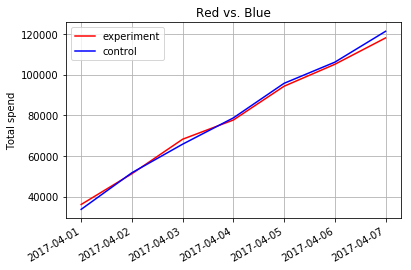

In [43]:
# now, PrintCumulativeTimeSeries()
# a few function to return the cumulative sum instead of sum
def GetCumulativeSeries(my_data, my_id, country,vertical):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country)&(my_data.vertical == vertical)]
    series = table.groupby('date')['spend_usd'].sum() # select date, sum(spend) from a group by 1
    series = np.cumsum(series) ## this is the key
    total_revenue = series[-1]
    return((series, total_revenue))

# same as before
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeTimeSeries(my_data, experiment_ids, country,vertical):
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0], country,vertical)[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0], country,vertical)[1]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1], country,vertical)[0]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1], country,vertical)[1]
    
    print("Cumulative revenue impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)
PrintCumulativeTimeSeries(my_data, [12624548,12624549], "JP","ANDROID_APPS")